In [12]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
sys.path.append(os.path.abspath('..'))
import lib_gs as lib

In [17]:
path = './Donnees/'

In [18]:
## Mesures de "vent en rafale" du réseau de stations sol
obs_mf =np.loadtxt(f"{path}obs_wind_mf.txt")
E_mf = obs_mf[:,0:1]/1e3 # km
N_mf = obs_mf[:,1:2]/1e3 # km
v_mf = obs_mf[:,2:3]

## Sorties du champ "vent en rafale" de la réanalyse ERA5
obs_era5 = np.loadtxt(f"{path}mod_wind_era5.txt")
E_era5 = obs_era5[:, 0:1] / 1e3  # km
N_era5 = obs_era5[:, 1:2] / 1e3  # km
v_era5 = obs_era5[:, 2:3]

# Contour de la France métropolitaine
FR_contour =np.loadtxt(f"{path}FR_contour.txt")
E = FR_contour[:,0:1]/1e3
N = FR_contour[:,1:2]/1e3


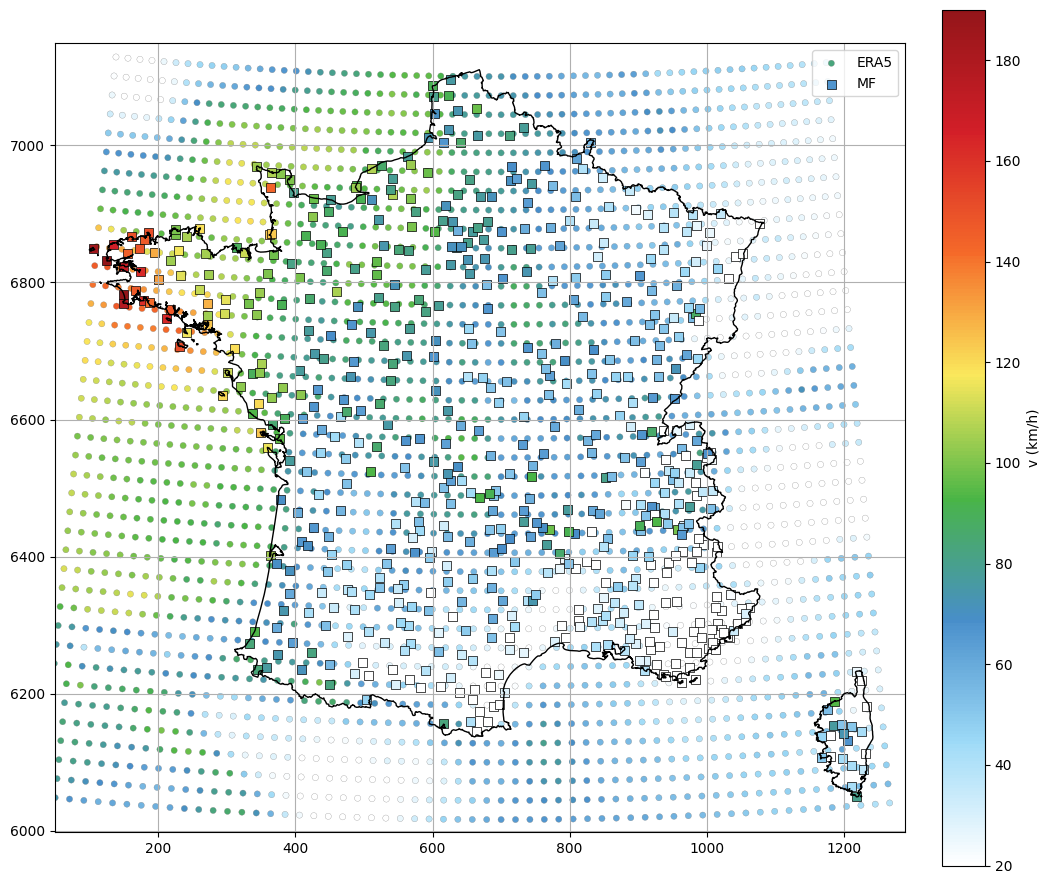

In [15]:
fig = plt.figure(figsize=(12,12))
# chargement de la carte de couleur et conversion au format matplotlib
NCL = col.ListedColormap(np.loadtxt(f"{path}ncl.rgb")/255)
# tracé des vitesses ERA5, sous forme de cercles de taille 20, avec un contour gris de taille 0.2
lib.plot_patch(E_era5,N_era5,v_era5,fig = fig, minmax = [20, 190], cmap = NCL, s=20,\
               xlabel='E (km)',ylabel='N (km)', zlabel = 'v (km/h)',lw=0.2, ec='0.5')
# tracé des vitesses observées, sous forme de carrés de taille 42, avec un contour noir de taille 0.5, sans colorbar
lib.plot_patch(E_mf,N_mf,v_mf,fig=fig,minmax = [20,190],marker='s',s=42,cmap=NCL,lw=0.5, ec='k',cb=False)
# tracé des contours
plt.plot(E,N,'k',linewidth=1)
plt.legend(['ERA5','MF'])
plt.grid();